<a href="https://colab.research.google.com/github/TheBottomOfTheDeepDarkOcean/AIO-Exercise/blob/develop/Module4/Logistic%20Regression/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(
  dataset_path,
  index_col ='PassengerId'
)

In [ ]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [ ]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]

In [ ]:
X.shape, y.shape

((891, 8), (891,))

In [ ]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate(
  (intercept,  X),
  axis =1
)
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [ ]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

In [ ]:
X_train.shape, y_train.shape

((623, 9), (623,))

In [ ]:
X_val.shape, y_val.shape

((179, 9), (179,))

In [ ]:
X_test.shape, y_test.shape

((89, 9), (89,))

In [ ]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[: ,1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [ ]:
X_train[:5]

array([[ 1.        ,  0.8380325 , -0.73366996, -0.20525287,  0.47107047,
        -0.46475094, -0.34812766,  0.89679528, -0.55130115],
       [ 1.        , -1.55141486, -0.73366996,  0.49488575,  0.47107047,
         1.90852642,  1.76556546, -0.60106922, -0.55130115],
       [ 1.        ,  0.8380325 , -0.73366996, -0.04966651, -0.46060224,
        -0.46475094, -0.47988477, -0.60106922, -0.55130115],
       [ 1.        , -1.55141486,  1.3630107 ,  1.50619709,  0.47107047,
        -0.46475094,  0.89901092,  0.89679528,  0.0754518 ],
       [ 1.        , -1.55141486,  1.3630107 ,  0.02812667, -0.46060224,
        -0.46475094, -0.01677631,  0.89679528,  0.70220475]])

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [ ]:
def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)
  return y_hat

In [ ]:
def compute_loss (y_hat , y) :
  y_hat = np.clip(
  y_hat, 1e-7, 1 - 1e-7
)

  return ( -y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

In [ ]:
def compute_gradient(X, y, y_hat):
  return np.dot(X.T, ( y_hat - y)) / y.size

In [ ]:
def update_theta(theta, gradient, lr):
  return theta - lr * gradient

In [ ]:
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  acc = (y_hat == y).mean()
  return acc

In [ ]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size = X_train.shape[1])
theta

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097, 0.29965467])

In [ ]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range (0 , X_train . shape [0] , batch_size ) :
    X_i = X_train[i : i + batch_size]
    y_i = y_train[i : i + batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)
  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.703	Validation loss: 0.599

EPOCH 2:	Training loss: 0.670	Validation loss: 0.582

EPOCH 3:	Training loss: 0.640	Validation loss: 0.567

EPOCH 4:	Training loss: 0.614	Validation loss: 0.555

EPOCH 5:	Training loss: 0.592	Validation loss: 0.544

EPOCH 6:	Training loss: 0.572	Validation loss: 0.535

EPOCH 7:	Training loss: 0.554	Validation loss: 0.528

EPOCH 8:	Training loss: 0.539	Validation loss: 0.522

EPOCH 9:	Training loss: 0.526	Validation loss: 0.517

EPOCH 10:	Training loss: 0.514	Validation loss: 0.513

EPOCH 11:	Training loss: 0.504	Validation loss: 0.509

EPOCH 12:	Training loss: 0.495	Validation loss: 0.507

EPOCH 13:	Training loss: 0.487	Validation loss: 0.505

EPOCH 14:	Training loss: 0.480	Validation loss: 0.503

EPOCH 15:	Training loss: 0.474	Validation loss: 0.502

EPOCH 16:	Training loss: 0.468	Validation loss: 0.501

EPOCH 17:	Training loss: 0.463	Validation loss: 0.500

EPOCH 18:	Training loss: 0.459	Validation loss: 0.500

EPOCH 19:	Training

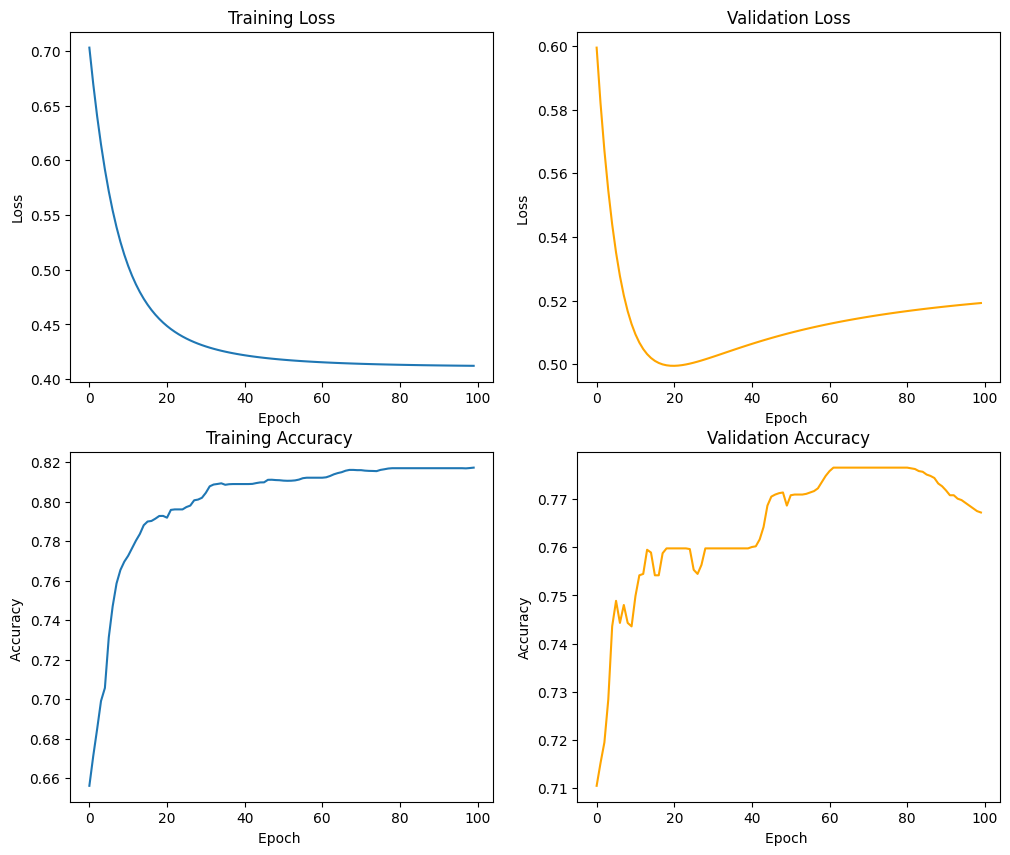

In [ ]:
fig, ax = plt.subplots(2, 2, figsize =(12 , 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel = 'Epoch ', ylabel = 'Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, 'orange')
ax[0, 1].set(xlabel = 'Epoch ', ylabel = 'Loss ')
ax[0 , 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel = 'Epoch ', ylabel ='Accuracy ')
ax[1, 0].set_title('Training Accuracy ')

ax[1, 1].plot(val_accs, 'orange')
ax[1, 1].set(xlabel ='Epoch ', ylabel ='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [ ]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on validation and test set :')
print(f'Accuracy : {val_set_acc}')
print(f'Accuracy : {test_set_acc}')

Evaluation on validation and test set :
Accuracy : 0.770949720670391
Accuracy : 0.7752808988764045
